In [28]:
import pandas as pd


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.metrics import mean_squared_error
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.7.0


In [31]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression


In [32]:
df = pd.read_parquet('data/green_tripdata_2021-02.parquet')

In [33]:
df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

/tmp/ipykernel_22408/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

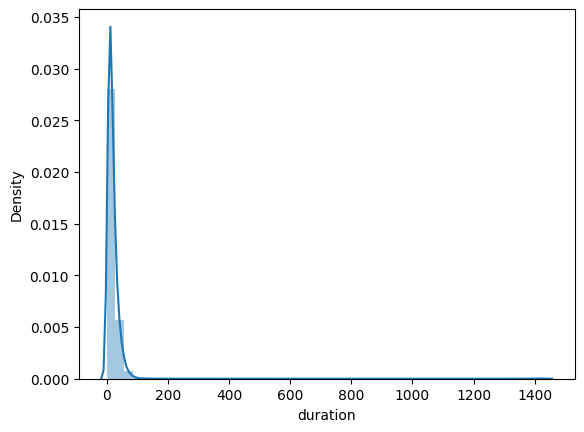

In [34]:
sns.distplot(df.duration)

In [35]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    64572.000000
mean        20.978724
std         53.167437
min          0.000000
50%         14.825000
95%         49.000000
98%         63.000000
99%         75.204833
max       1439.616667
Name: duration, dtype: float64

In [36]:
(df.duration >=1)

0        True
1        True
2        True
3        True
4        True
         ... 
64567    True
64568    True
64569    True
64570    True
64571    True
Name: duration, Length: 64572, dtype: bool

In [37]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [38]:
df[categorical] = df[categorical].astype(str)

In [39]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000


In [40]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [41]:
dv=DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [42]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193716 stored elements and shape (64572, 505)>

In [43]:
#dv.feature_names_

In [44]:
target = 'duration'
y_train=df[target].values

In [45]:
y_train

array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
        7.        ,  7.        ], shape=(64572,))

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_22408/437147669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_22408/437147669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


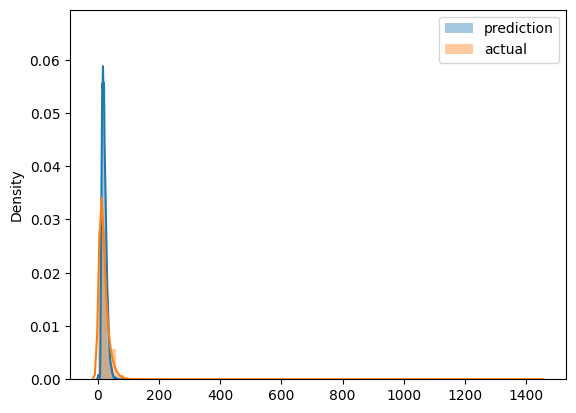

In [48]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()


In [49]:
mean_squared_error(y_train, y_pred, squared=False)

TypeError: got an unexpected keyword argument 'squared'